In [1]:
#import libraries
import pandas as pd
import os

# Actual Dispatch dataset

In [2]:
data_frames_1=[]
data_frames_2=[]
for i in range(0,31):
    df=pd.read_excel(r'E:\Desktop\Datasets\actual_july\15 min Dispatch July 2020.xlsx',sheet_name=i) 

    temp=list(df.columns)

    date = temp[8].date()
    df.columns = df.iloc[0]
    df=df.drop(0)
    df=df.drop(columns=df.columns[-3:],axis=1)
    x=df.iloc[:, 0]

    t=0
    for i in x:
        t=t+1
        if i=='Total MW':

            break
    df=df.iloc[:t-1, :]
    df1 = pd.DataFrame()
    import datetime as dt
    t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
    for i in range (1,len(df.columns),2):
        df1[str(t1.time())]=df.iloc[:, i]+df.iloc[:, i+1]
        t2 = dt.datetime.strptime('00:30:00', '%H:%M:%S')
        time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
        x=(t1 - time_zero + t2).time()
        t1 = dt.datetime.strptime(str(x), '%H:%M:%S')
        
    m=df.iloc[:t-1, 0]
    list(m)
    df1.insert(0, 'Power_Plant', m)
    df2=pd.melt(df1,id_vars=['Power_Plant'])
    df1['Date']=date
    df2['Date']=date
    data_frames_1.append(df1)
    data_frames_2.append(df2)


In [3]:
data_frames_1[0].head() #1st of july dataframe..

,Power_Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Date
1,Canyon,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,...,60.0,60.0,60.0,60.0,60.0,60.0,30.0,0.0,0.0,2020-07-01
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-01
3,Olax,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,34.0,...,103.0,42.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2020-07-01
4,Nlax,91.0,39.0,34.0,19.0,20.0,22.0,31.0,59.0,84.0,...,212.0,210.0,210.0,168.0,36.0,58.0,71.0,76.0,54.0,2020-07-01
5,Polp,40.0,39.0,35.0,42.0,46.0,44.0,46.0,42.0,49.0,...,180.0,175.0,144.0,111.0,81.0,45.0,46.0,43.0,40.0,2020-07-01


In [4]:
data_frames_1[0].dtypes

Power_Plant    object
00:00:00       object
00:30:00       object
01:00:00       object
01:30:00       object
02:00:00       object
02:30:00       object
03:00:00       object
03:30:00       object
04:00:00       object
04:30:00       object
05:00:00       object
05:30:00       object
06:00:00       object
06:30:00       object
07:00:00       object
07:30:00       object
08:00:00       object
08:30:00       object
09:00:00       object
09:30:00       object
10:00:00       object
10:30:00       object
11:00:00       object
11:30:00       object
12:00:00       object
12:30:00       object
13:00:00       object
13:30:00       object
14:00:00       object
14:30:00       object
15:00:00       object
15:30:00       object
16:00:00       object
16:30:00       object
17:00:00       object
17:30:00       object
18:00:00       object
18:30:00       object
19:00:00       object
19:30:00       object
20:00:00       object
20:30:00       object
21:00:00       object
21:30:00       object
22:00:00  

In [8]:
x=list(data_frames_1[0].columns)
x

['Power_Plant',
 '00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00',
 'Date']

In [10]:
len(x)

50

In [12]:
#convert the object datatype to float datatype
for i in x:
    if i=='Date' or i=='Power_Plant':
        continue
    else:
        data_frames_1[0][i] = data_frames_1[0][i].astype(float)
        

In [13]:
data_frames_1[0].dtypes

Power_Plant     object
00:00:00       float64
00:30:00       float64
01:00:00       float64
01:30:00       float64
02:00:00       float64
02:30:00       float64
03:00:00       float64
03:30:00       float64
04:00:00       float64
04:30:00       float64
05:00:00       float64
05:30:00       float64
06:00:00       float64
06:30:00       float64
07:00:00       float64
07:30:00       float64
08:00:00       float64
08:30:00       float64
09:00:00       float64
09:30:00       float64
10:00:00       float64
10:30:00       float64
11:00:00       float64
11:30:00       float64
12:00:00       float64
12:30:00       float64
13:00:00       float64
13:30:00       float64
14:00:00       float64
14:30:00       float64
15:00:00       float64
15:30:00       float64
16:00:00       float64
16:30:00       float64
17:00:00       float64
17:30:00       float64
18:00:00       float64
18:30:00       float64
19:00:00       float64
19:30:00       float64
20:00:00       float64
20:30:00       float64
21:00:00   

In [ ]:
data_frames_1[0].describe()

In [15]:
df1=data_frames_1[0].drop(['Date','Power_Plant'],axis=1)

In [16]:
df1.head()

,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
1,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,30.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,34.0,66.0,...,104.0,103.0,42.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
4,91.0,39.0,34.0,19.0,20.0,22.0,31.0,59.0,84.0,34.0,...,212.0,212.0,210.0,210.0,168.0,36.0,58.0,71.0,76.0,54.0
5,40.0,39.0,35.0,42.0,46.0,44.0,46.0,42.0,49.0,36.0,...,180.0,180.0,175.0,144.0,111.0,81.0,45.0,46.0,43.0,40.0


## Standard Normalization

In [18]:
#import the required library
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler() #scaler object
scaler.fit(df1) #fit the dataframe..

StandardScaler()

In [21]:
scaled_df=scaler.transform(df1) #scaling.....

In [22]:
scaled_df

array([[-0.3698464 , -0.35824756, -0.3536451 , ..., -0.39252072,
        -0.56297763, -0.52880698],
       [-0.50452933, -0.49303377, -0.48836704, ..., -0.59768973,
        -0.56297763, -0.52880698],
       [-0.43718787, -0.42564066, -0.42100607, ..., -0.40619865,
        -0.37311766, -0.34062951],
       ...,
       [-0.50452933, -0.49303377, -0.48836704, ..., -0.59768973,
        -0.56297763, -0.52880698],
       [ 0.1688853 ,  0.16067935,  0.14482609, ...,  0.17511355,
         0.21002367,  0.2843885 ],
       [ 0.37764384,  0.38981591,  0.37385339, ...,  0.21614736,
         0.28461151,  0.33815349]])

## Apply PCA

In [23]:
from sklearn.decomposition import PCA #principal component analysis library

### reduce to 10 features(principal components) 

In [24]:
pca=PCA(n_components=10) #convert 48 features of the dataset into 10 features #PCA object

In [25]:
pca.fit(scaled_df)

PCA(n_components=10)

In [26]:
x_pca=pca.transform(scaled_df) #transform to 10 main features

In [27]:
scaled_df.shape #48 dimensions...

(38, 48)

In [28]:
x_pca.shape #reduce to 10 dimensions....

(38, 10)

In [30]:
x_pca

array([[-2.87728445e+00,  2.78865064e-01, -4.65629990e-02,
        -3.47818241e-01, -3.21939102e-01,  1.98727680e-01,
         2.25415544e-02, -3.78057304e-01,  1.90796767e-01,
         8.67837428e-02],
       [-3.72196258e+00,  5.49682250e-02, -6.57140193e-01,
        -4.82432236e-02, -1.68527094e-01,  2.33096389e-02,
        -6.01628462e-02, -2.22753727e-01,  1.56599086e-01,
        -8.46534408e-02],
       [-1.88856234e+00,  3.37462050e-01, -3.41187903e-01,
         3.45204542e-01,  2.19192248e-01, -4.19415758e-02,
        -3.31873295e-02,  8.39667335e-01,  1.09663511e-01,
         1.66666837e-02],
       [ 1.32375514e+00,  1.76749080e+00,  1.08039683e-02,
         1.33674638e+00, -4.19583699e-01,  1.00273739e+00,
        -5.76168852e-01, -9.10153736e-02, -1.53323738e-01,
        -1.55966055e-01],
       [ 4.22839023e-01,  1.18612933e+00, -2.50933647e-02,
         1.01443818e+00, -2.79552501e-01,  2.21099762e-02,
         9.30604777e-01, -2.06081691e-01,  6.16724074e-01,
        -1.

### reduce to 2 features(principal components) 

In [31]:
pca1=PCA(n_components=2) #convert 48 features of the dataset into 2 features #PCA object

In [32]:
pca1.fit(scaled_df)

PCA(n_components=2)

In [33]:
x_pca1=pca1.transform(scaled_df) #transform to 2 main features(principal components)

In [34]:
x_pca1.shape #reduce to 10 dimensions....

(38, 2)

Text(0, 0.5, 'second principal component')

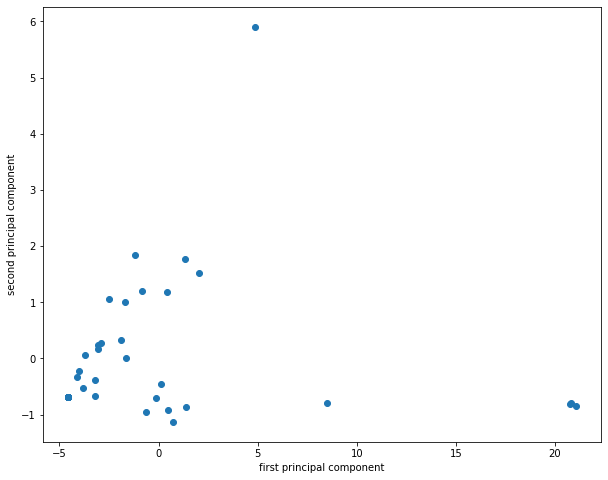

In [36]:
import matplotlib.pyplot as plt #import the vizualization library...

#plot the reduced 2 features(in scatter plot)
plt.figure(figsize=(10,8))
plt.scatter(x_pca1[:,0],x_pca1[:,1]) 
plt.xlabel('first principal component')
plt.ylabel('second principal component')